In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_columns=["sex","smoker"]

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_columns:
    df[i]=le.fit_transform(df[i])

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [9]:
df_region=pd.get_dummies(df.region)
df=pd.concat([df,df_region],axis=1)
df=df.drop(["region"],axis=1)

In [10]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [11]:
df.shape

(1338, 10)

In [12]:
corr=df.corr()

<AxesSubplot:>

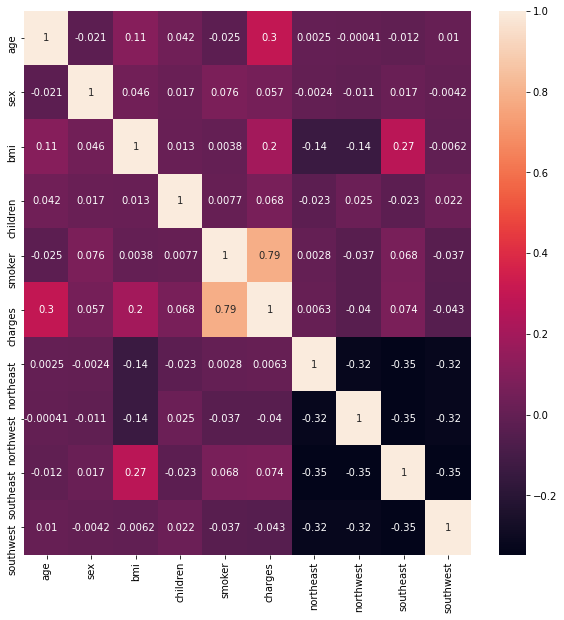

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='smoker', ylabel='count'>

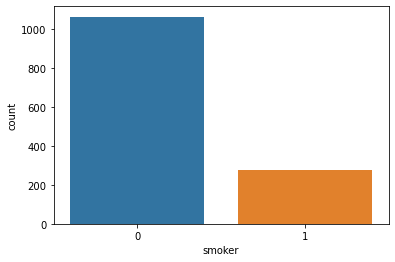

In [14]:
sns.countplot(x ='smoker', data = df)

<AxesSubplot:xlabel='age', ylabel='count'>

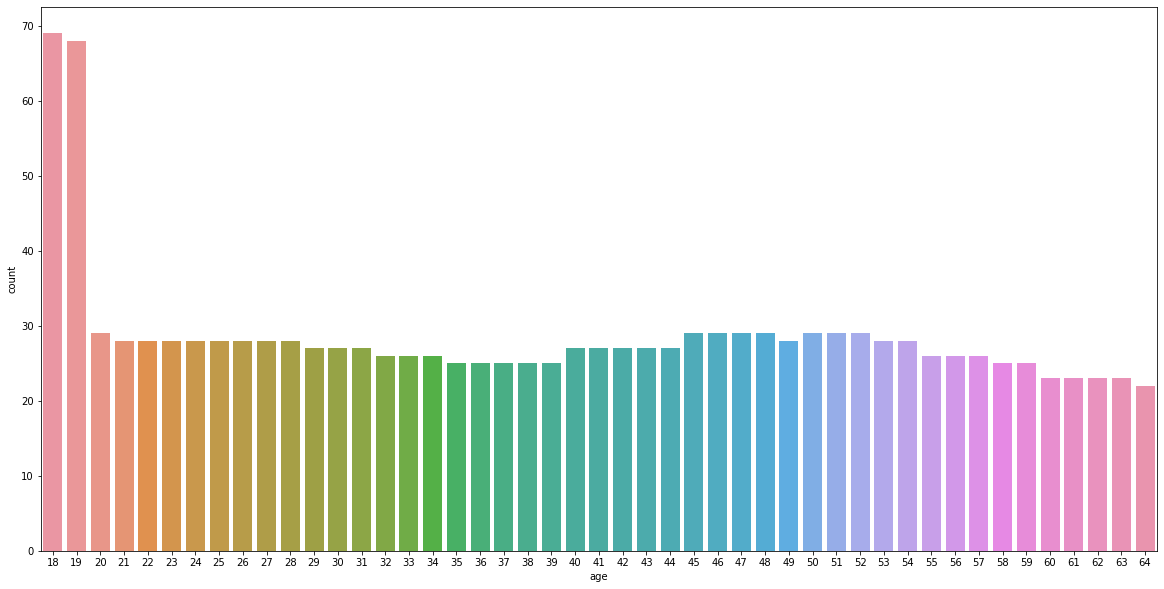

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(df["age"])

<AxesSubplot:xlabel='children', ylabel='count'>

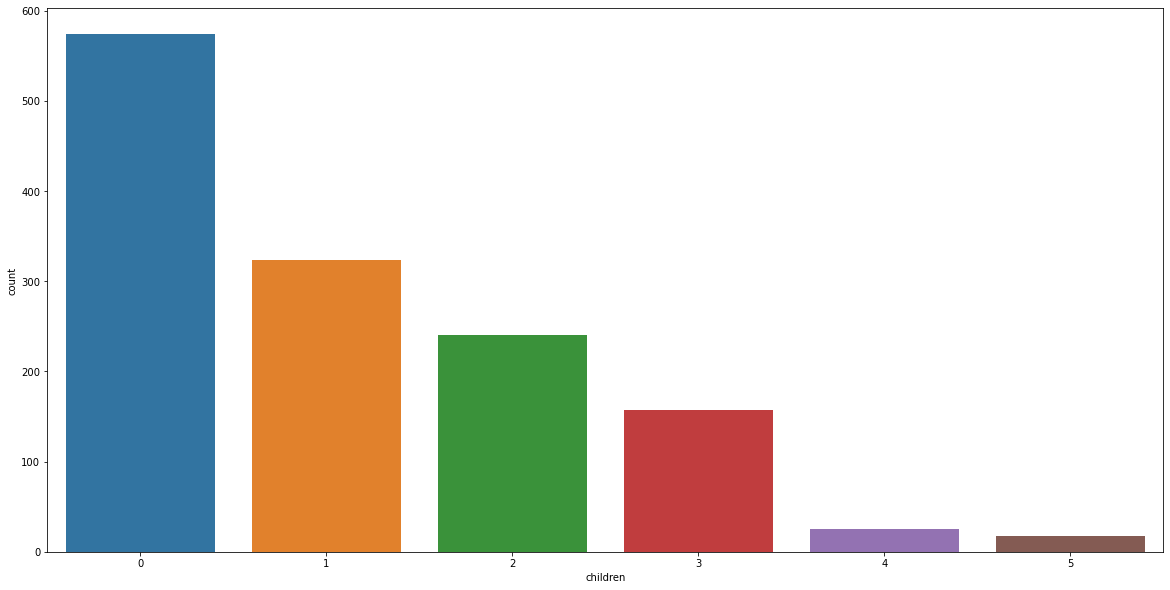

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(df["children"])

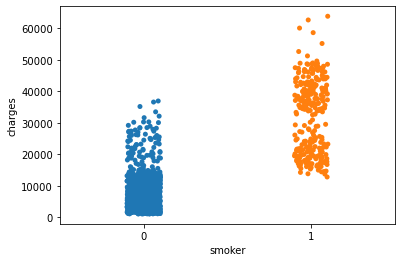

In [17]:
ax = sns.stripplot(x='smoker', y='charges', data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

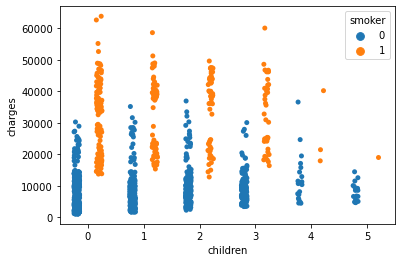

In [18]:
sns.stripplot(x='children', y='charges', data=df,
              jitter=True, hue='smoker', dodge=True)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

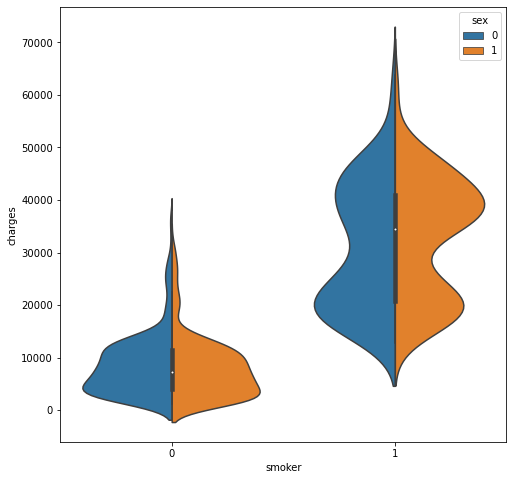

In [19]:
plt.figure(figsize=(8,8))
sns.violinplot(x='smoker', y='charges', data=df,
               hue='sex', split=True)

In [20]:
df_columns=["age","sex","bmi","children","charges"]

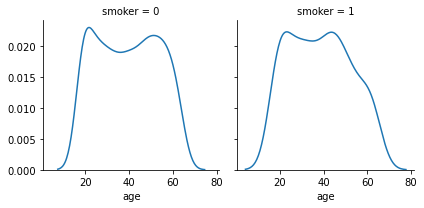

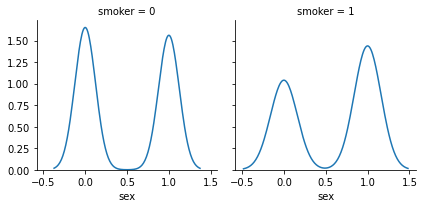

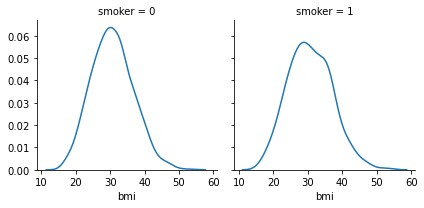

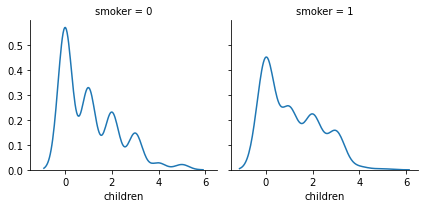

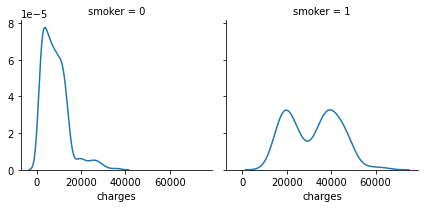

In [21]:
for i in df_columns:
    g = sns.FacetGrid(df, col='smoker')
    g = g.map(sns.kdeplot, i)

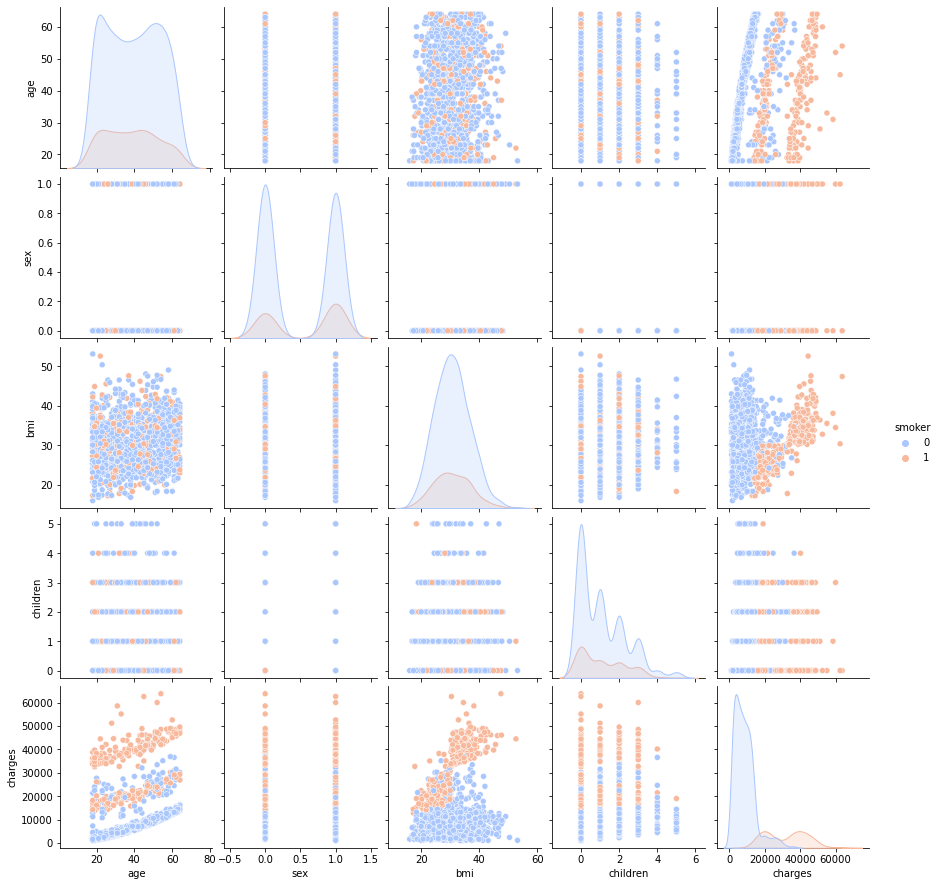

In [22]:
sns.pairplot(df.drop(["northeast","northwest","southeast","southwest"],axis=1),hue="smoker",palette="coolwarm")

<AxesSubplot:xlabel='bmi', ylabel='charges'>

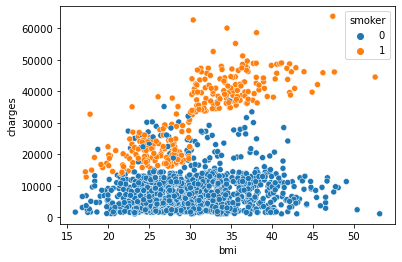

In [23]:
sns.scatterplot(x="bmi",y="charges",hue="smoker",data=df)

<AxesSubplot:xlabel='charges', ylabel='bmi'>

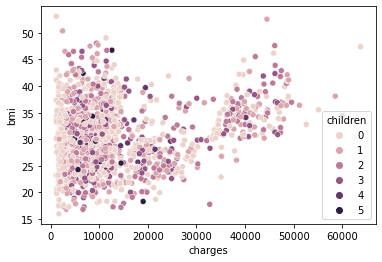

In [24]:
sns.scatterplot(x="charges",y="bmi",hue="children",data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

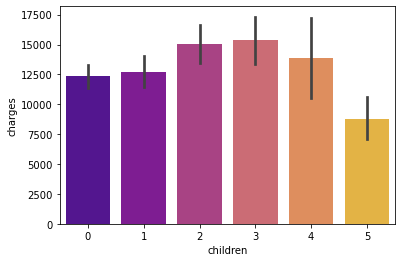

In [25]:
sns.barplot(x ='children', y ='charges', data = df,palette ='plasma')

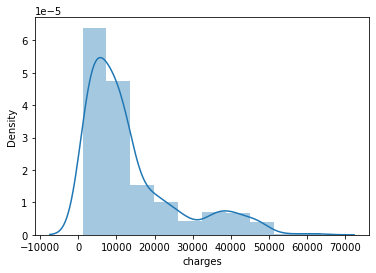

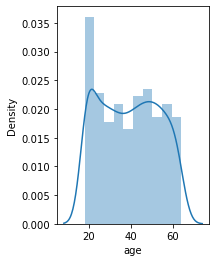

In [26]:
plt.subplot(111)
sns.distplot(df["charges"], bins=10, kde=True)
plt.show()

plt.subplot(121)
sns.distplot(df["age"],bins=10,kde=True)
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

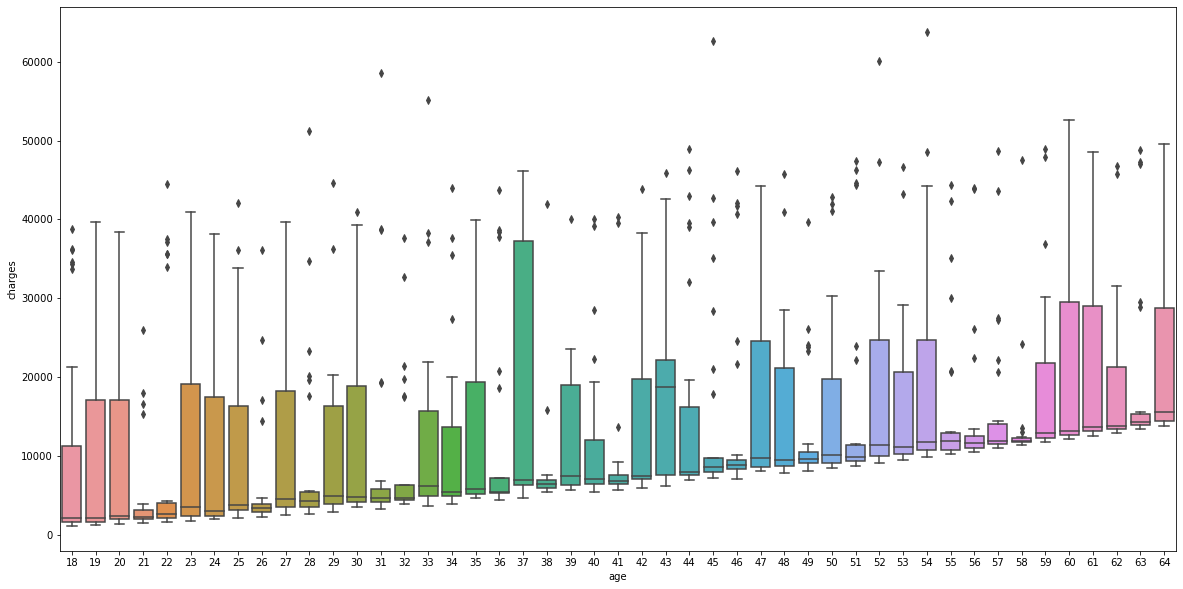

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot('age', 'charges', data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

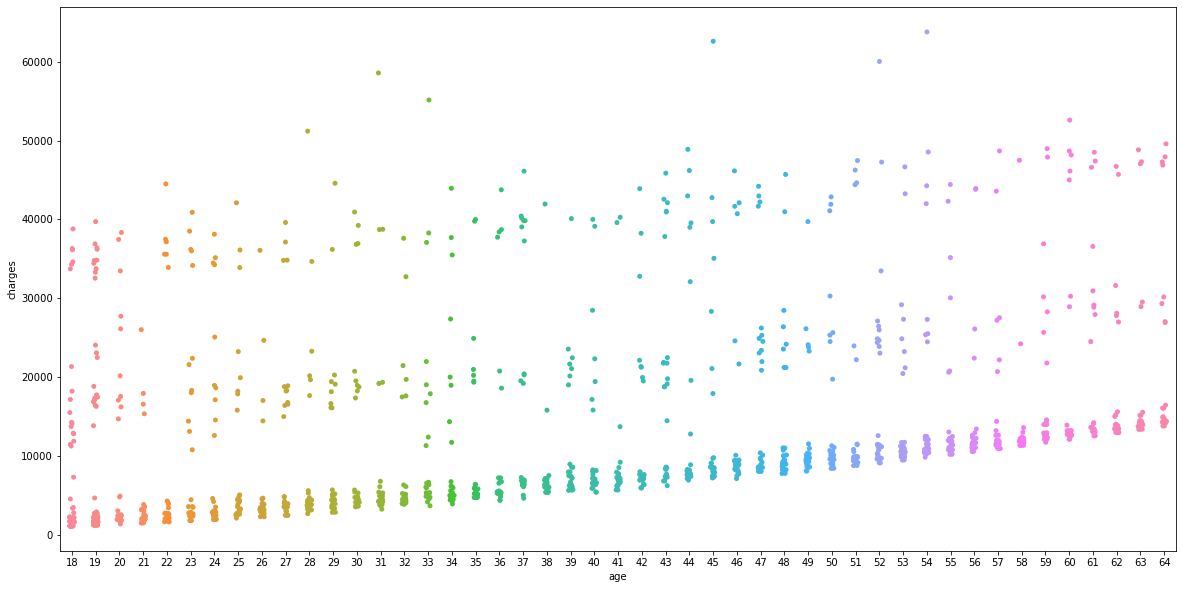

In [28]:
plt.figure(figsize=(20,10))
sns.stripplot(x='age', y='charges', data=df)

In [29]:
df_columns=["age","sex","bmi","children","smoker"]

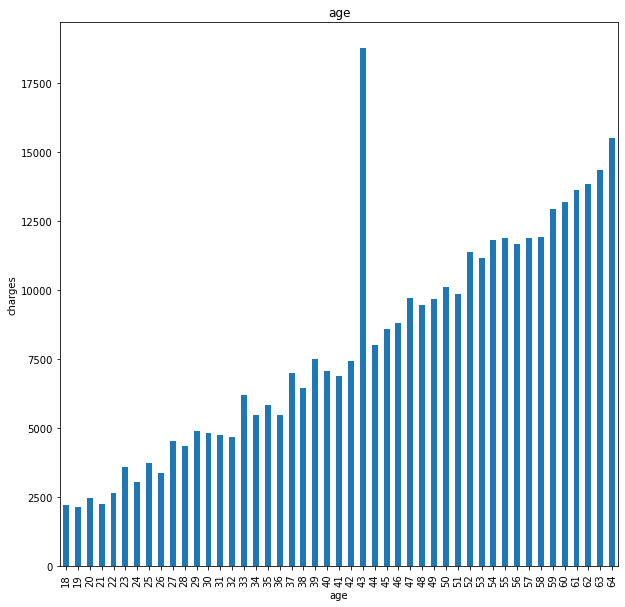

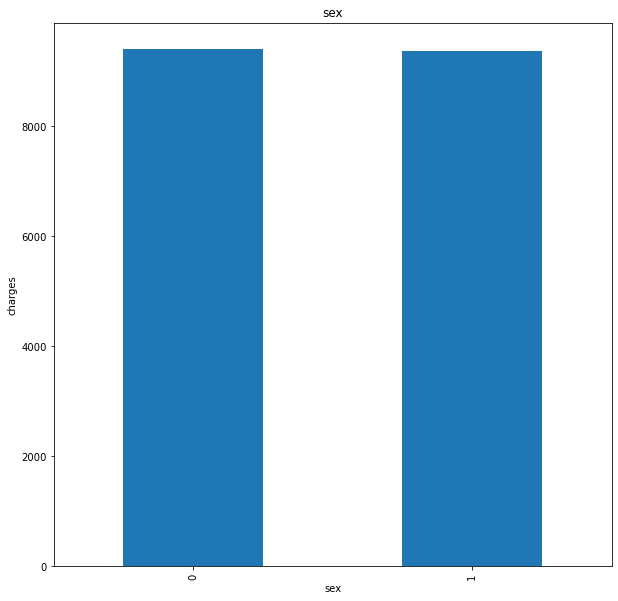

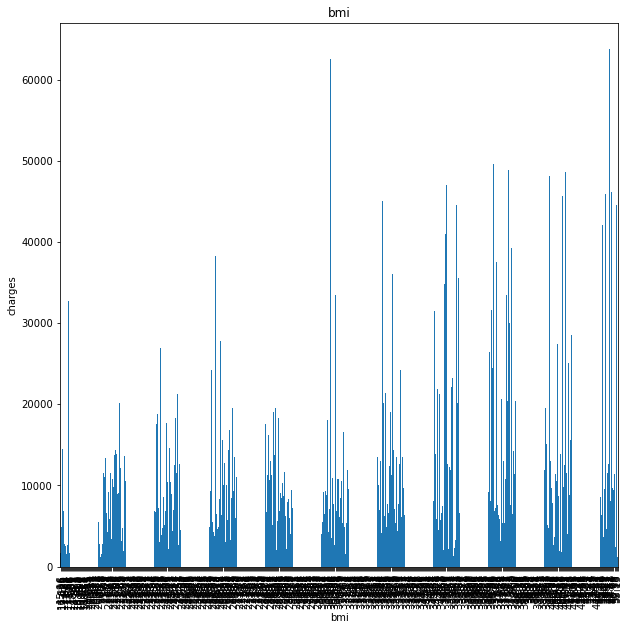

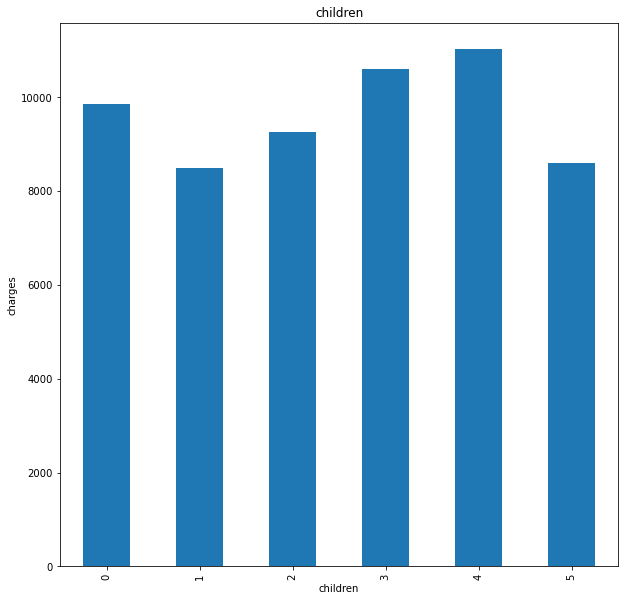

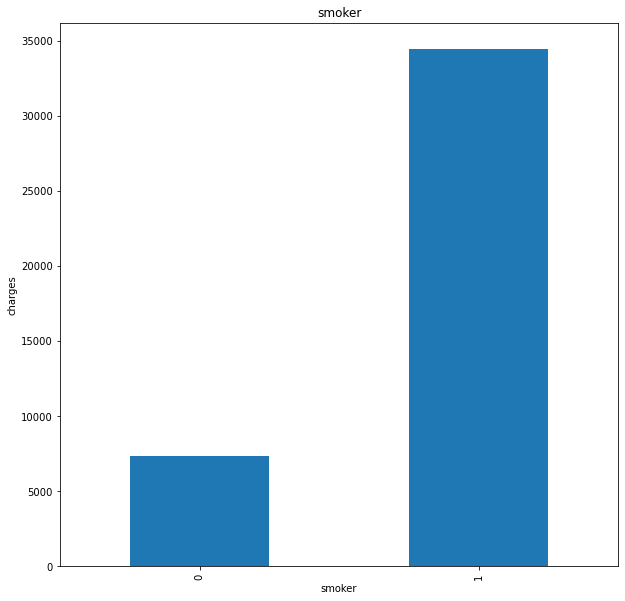

In [30]:
for feature in df_columns:
    data=df.copy()
    plt.figure(figsize=(10,10))
    data.groupby(feature)["charges"].median().plot.bar()
    plt.ylabel("charges")
    plt.title(feature)
    plt.show()

In [31]:
X=df.drop(["charges"],axis=1)
y=df["charges"]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
lr_pred = lr.predict(X_test)

In [38]:
print(lr.score(X_test,y_test))

0.7999876970680433


In [40]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [41]:
regressor_pred = regressor.predict(X_train)

In [45]:
regressor.score(X_test,y_test)

0.9741917785794524

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
print('MSE train data: %.3f' % (
mean_squared_error(y_train,regressor_pred)))
print('R2 train data: %.3f' % (
r2_score(y_train,regressor_pred)))

MSE train data: 5098416.425
R2 train data: 0.964
